#Argument Clustering

# Import Libraries:
We start by importing the necessary libraries for our analysis. This includes libraries for data manipulation (pandas), natural language processing (spacy), clustering (sklearn), and visualization (matplotlib).

# Load spaCy Model:
We load the English language model from spaCy. This model allows us to process text data, identify parts of speech, and extract meaningful information.


In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import spacy
import matplotlib.pyplot as plt

#spacy English model
nlp = spacy.load("en_core_web_sm")


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/predictions_filtered_paragraphs_GenAI.csv')

data


,Unnamed: 0,title,outlet,date,body,region,paragraphs,predicted_label
0,8,'This song sucks': Nick Cave trashes AI-genera...,Agence France Presse,2023-01-17,Artificial intelligence (AI) tools may be able...,Europe,"One of the AI-created verses runs: ""I'm the ki...",Argument_against
1,12,Meta unveils more cautious approach to ChatGPT...,Agence France Presse,2023-02-24,Facebook-owner Meta on Friday unveiled its own...,Europe,Facebook-owner Meta on Friday unveiled its own...,Argument_for
2,12,Meta unveils more cautious approach to ChatGPT...,Agence France Presse,2023-02-24,Facebook-owner Meta on Friday unveiled its own...,Europe,"Meta described its own AI, called LLaMA, as a ...",Argument_against
3,22,Adecco chief says AI will create new jobs,Agence France Presse,2024-01-14,Artificial intelligence raises serious concern...,Europe,From meteorologists to lawyers and screenwrite...,Argument_for
4,24,China to require 'security assessment' for new...,Agence France Presse,2023-04-11,New AI products developed in China will have t...,Europe,"The draft law -- dubbed ""Administrative Measur...",Argument_for
...,...,...,...,...,...,...,...,...
2560,23621,Tencent embeds AI in 180 of its services,South China Morning Post,2023-10-28,Chinese social networking and video gaming gia...,Asia,Chinese social networking and video gaming gia...,Argument_for
2561,23631,'A.I. translations boost sales of online novels',South China Morning Post,2023-12-07,China's online literature industry has enjoyed...,Asia,Since Microsoft-backed US start-up OpenAI rele...,Argument_against
2562,23651,Shanghai unveils goals for high-end manufacturing,South China Morning Post,2023-06-16,Shanghai has unveiled a plan to boost high-end...,Asia,"It is also ramping up investment in AI, includ...",Argument_for
2563,23669,Large language models should be 'kept in a cag...,South China Morning Post,2023-07-04,Government bodies and enterprises in China sho...,Asia,"""If LLMs are closely incorporated into a compa...",Argument_against


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Group Data:
The data is grouped by the 'region' column, allowing us to analyze and cluster text paragraphs separately for each region.

In [ ]:
# Group the data by the 'region' column
grouped_data = data.groupby('region')
grouped_data.head()

,Unnamed: 0,title,outlet,date,body,region,paragraphs,predicted_label
0,8,'This song sucks': Nick Cave trashes AI-genera...,Agence France Presse,2023-01-17,Artificial intelligence (AI) tools may be able...,Europe,"One of the AI-created verses runs: ""I'm the ki...",Argument_against
1,12,Meta unveils more cautious approach to ChatGPT...,Agence France Presse,2023-02-24,Facebook-owner Meta on Friday unveiled its own...,Europe,Facebook-owner Meta on Friday unveiled its own...,Argument_for
2,12,Meta unveils more cautious approach to ChatGPT...,Agence France Presse,2023-02-24,Facebook-owner Meta on Friday unveiled its own...,Europe,"Meta described its own AI, called LLaMA, as a ...",Argument_against
3,22,Adecco chief says AI will create new jobs,Agence France Presse,2024-01-14,Artificial intelligence raises serious concern...,Europe,From meteorologists to lawyers and screenwrite...,Argument_for
4,24,China to require 'security assessment' for new...,Agence France Presse,2023-04-11,New AI products developed in China will have t...,Europe,"The draft law -- dubbed ""Administrative Measur...",Argument_for
220,1335,Analysts upbeat about S'pore chip industry's l...,Straits_Times,2023-08-18,A lack of consumer demand for electronic goods...,Asia,There has been an explosion of interest in ge...,Argument_for
221,1366,Next-generation robots are ready to take over ...,Straits_Times,2023-08-13,"A humanoid warehouse worker, Digit, walked upr...",Asia,"Then ChatGPT came online, and suddenly the fe...",Argument_against
222,1374,Those without AI expertise will be left behind...,Straits_Times,2023-05-30,HONG KONG Firms and individuals should familia...,Asia,"""While some worry that AI may take their jobs...",Argument_for
223,1383,"Train future-ready students to ask questions, ...",Straits_Times,2023-04-19,The global educational model has been focused ...,Asia,Regurgitation of correct answers will not be ...,Argument_against
224,1384,An explainer for kids: What is ChatGPT',Straits_Times,2023-04-10,"If you spend any time online, you have probabl...",Asia,ChatGPT has the ability to understand natural...,Argument_for



# Filter Nouns:
We define a function to filter nouns from the text paragraphs. This helps us focus on the key concepts and entities discussed in the text.

# Cluster Paragraphs:
A function is defined to cluster the text paragraphs using the KMeans algorithm and TF-IDF vectorization. This step aims to group similar paragraphs together based on their content.

# Cluster by Region:
The clustering process is applied to each region's paragraphs separately, identifying clusters of similar topics within each region.

# Extract Top Themes:
We define a function to extract the most prominent themes from the clusters identified in each region.

# Create Themes DataFrame:
A pandas DataFrame is created to store the top themes for each region in a structured format.

# Calculate Stance by Theme:
For each theme in each region, we calculate the overall stance expressed in the paragraphs associated with that theme. The stance can be either "Argument_for" or "Argument_against."


In [ ]:
#filter nouns and apply thresholds for OpenAI and ChatGPT
def filter_nouns(paragraphs, threshold_words={'openai': 5, 'chatgpt': 5}, exclude_words={'technology', 'intelligence', 'model', 'tool'}):
    filtered_paragraphs = []
    for paragraph in paragraphs:
        doc = nlp(paragraph)
        #extract nouns and lemmatize the words
        filtered_tokens = [token.lemma_ for token in doc if token.pos_ == "NOUN" and token.lemma_.lower() not in exclude_words]

        #apply threshold for openai and chatgpt
        for word, threshold in threshold_words.items():
            count = filtered_tokens.count(word)
            if count < threshold:
                filtered_tokens = [token for token in filtered_tokens if token != word]

        filtered_paragraphs.append(" ".join(filtered_tokens))
    return filtered_paragraphs


#cluster paragraphs using KMEANS and TFIDF
def cluster_paragraphs(paragraphs, n_clusters=5):
    filtered_paragraphs = filter_nouns(paragraphs)
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(filtered_paragraphs)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X)

    return kmeans, vectorizer, kmeans.labels_


#groupby paragraphs by region
clustered_data = {}
for region, group in grouped_data:
    paragraphs = group['paragraphs'].values
    kmeans, vectorizer, labels = cluster_paragraphs(paragraphs)
    clustered_data[region] = {
        'paragraphs': paragraphs,
        'kmeans': kmeans,
        'vectorizer': vectorizer,
        'labels': labels
    }


#Extract the top 5 themes by region
def extract_top_themes(clustered_data, top_n=5):
    themes = {}
    for region, data in clustered_data.items():
        vectorizer = data['vectorizer']
        kmeans = data['kmeans']
        terms = vectorizer.get_feature_names_out()

        top_terms = []
        for i in range(kmeans.n_clusters):
            cluster_center = kmeans.cluster_centers_[i]
            top_indices = cluster_center.argsort()[-top_n:][::-1]
            top_terms.append([terms[idx] for idx in top_indices])

        themes[region] = top_terms

    return themes

top_themes = extract_top_themes(clustered_data)

themes_df = pd.DataFrame.from_dict(top_themes, orient='index')
themes_df.columns = [f'Theme {i+1}' for i in range(themes_df.shape[1])]


In [ ]:
themes_df

,Theme 1,Theme 2,Theme 3,Theme 4,Theme 5
Asia,"[language, court, potential, company, human]","[datum, user, chatbot, risk, language]","[llm, expert, source, application, enterprise]","[industry, service, application, tech, develop...","[student, world, teacher, computer, school]"
Europe,"[chatbot, job, people, world, way]","[risk, business, threat, security, potential]","[company, material, artificialintelligence, ch...","[product, consumer, value, company, investor]","[image, content, text, datum, development]"
Middle East,"[percent, innovation, training, capability, so...","[directive, application, objective, theopinion...","[language, parameter, service, datum, healthcare]","[government, service, customer, job, guide]","[future, company, development, impact, risk]"
North America,"[image, text, job, chatbot, work]","[people, year, chatbot, way, life]","[risk, tech, letter, humanity, leader]","[thing, industry, rise, year, company]","[company, datum, product, content, chatbot]"


# Plot Stance by Theme:
Bar plots are generated to visually represent the stance distribution for each theme in each region. This helps us understand how opinions and arguments vary across different themes and regions.

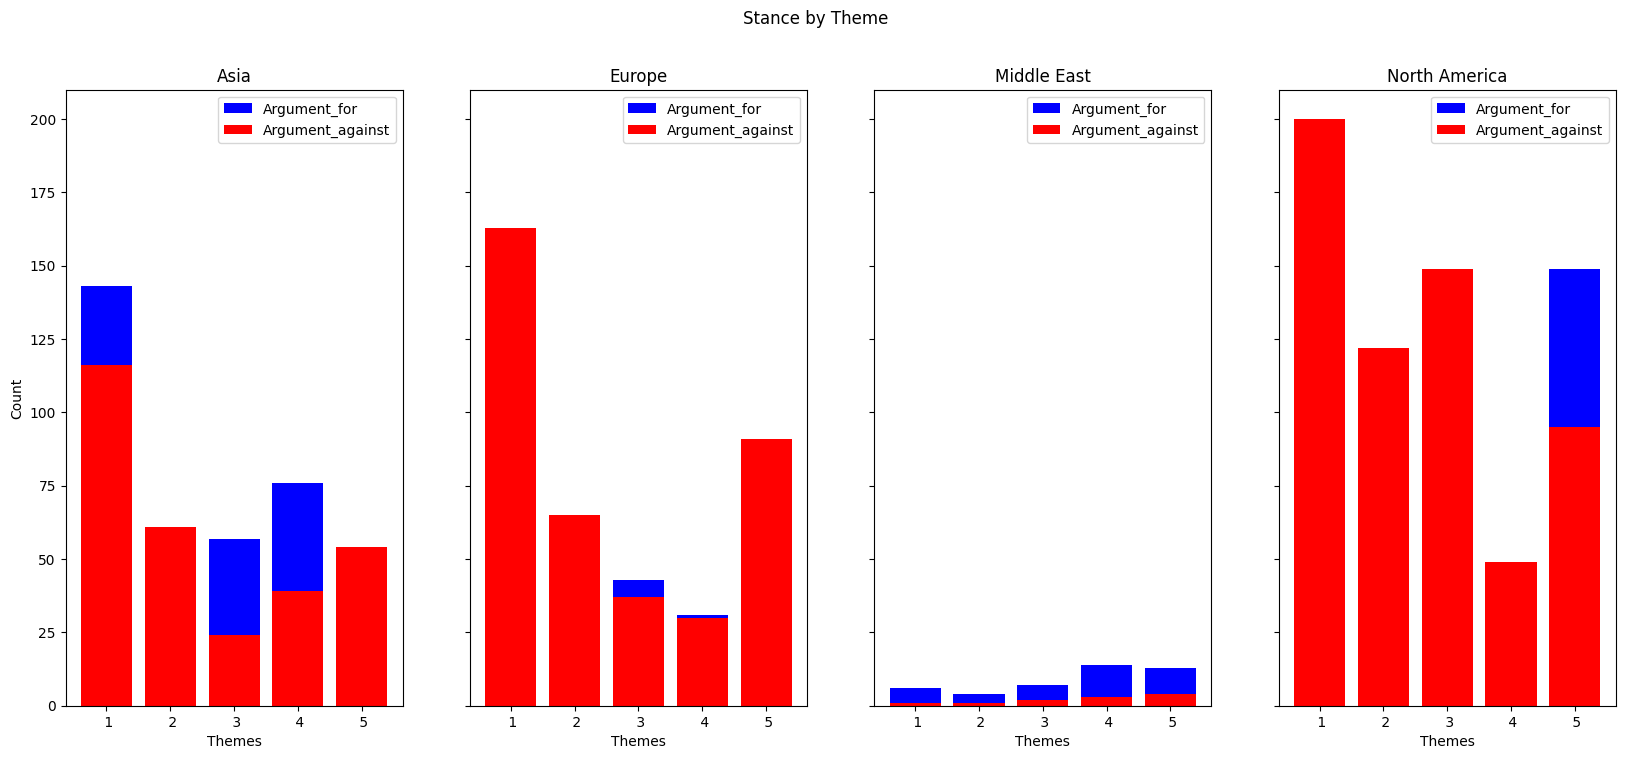

In [ ]:
import matplotlib.pyplot as plt

stance_data = {}
for region, data in clustered_data.items():
    paragraphs = data['paragraphs']
    labels = data['labels']
    stances = grouped_data.get_group(region)['predicted_label'].values

    theme_stances = {}
    for i in range(data['kmeans'].n_clusters):
        theme_stances[i] = {
            'Argument_for': sum((stances[labels == i] == 'Argument_for')),
            'Argument_against': sum((stances[labels == i] == 'Argument_against'))
        }

    stance_data[region] = theme_stances

#stance by theme
fig, axes = plt.subplots(nrows=1, ncols=len(stance_data), figsize=(20, 8), sharey=True)

for ax, (region, themes) in zip(axes, stance_data.items()):
    for theme, stances in themes.items():
        ax.bar(f' {theme+1}', stances['Argument_for'], color='blue', label='Argument_for' if theme == 0 else "")
        ax.bar(f' {theme+1}', stances['Argument_against'], color='red', label='Argument_against' if theme == 0 else "")
    ax.set_title(region)
    ax.set_xlabel('Themes')
    if ax == axes[0]:
        ax.set_ylabel('Count')
    ax.legend()

plt.suptitle('Stance by Theme')
plt.show()
